In [405]:
import numpy as np
import pandas as pd

data = pd.read_csv("time_series_covid_19_confirmed.csv")
print(data.shape)
data.head()

(501, 66)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [406]:
philippines_y = []
india_y = []

for j in range(4, 66): #These are the dates - on columns
    tempsum_philippines = 0
    tempsum_india = 0
    for i in range(0, len(data)):
        if data.iloc[i, 1] == "Philippines": #Check if the country is philippines
            tempsum_philippines = tempsum_philippines + data.iloc[i, j]
        if data.iloc[i, 1] == "India": #Check if the country is India
            tempsum_india = tempsum_india + data.iloc[i, j]
    philippines_y.append(tempsum_philippines)
    india_y.append(tempsum_india)
print("philippines cases up to 20/03/2020: {}".format(philippines_y[len(philippines_y) - 1]))
print("India cases up to 20/03/2020: {}".format(india_y[len(india_y) - 1]))
print(india_y)

philippines cases up to 20/03/2020: 380.0
India cases up to 20/03/2020: 396.0
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 28, 30, 31, 34, 39, 43, 56, 62, 73, 82, 102, 113, 119, 142, 156, 194, 244, 330, 396, 396.0]


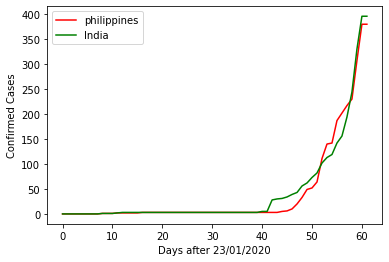

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 28, 30, 31, 34, 39, 43, 56, 62, 73, 82, 102, 113, 119, 142, 156, 194, 244, 330, 396, 396.0]


In [407]:
import matplotlib.pyplot as plt

plt.ylabel("Confirmed Cases")
plt.xlabel("Days after 23/01/2020")

plt.plot(philippines_y, color='red', label='philippines')
plt.plot(india_y, color='green', label='India')
plt.legend()
plt.show()
print(india_y)

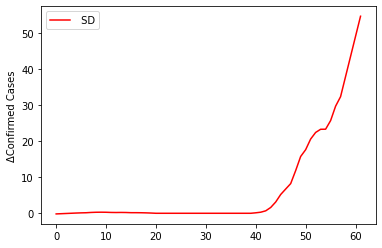

62

In [408]:
from scipy.signal import savgol_filter

deriv_philippines = savgol_filter(philippines_y, 9, 2, 1) #Polynomial degree is 2 since the function should look like a parabola

plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_philippines, color='red', label=" SD")
plt.legend()
plt.show()
len(philippines_y)

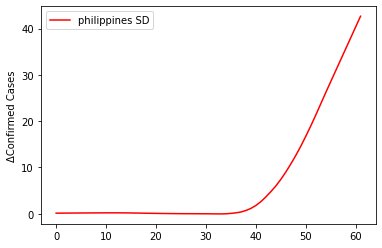

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 28, 30, 31, 34, 39, 43, 56, 62, 73, 82, 102, 113, 119, 142, 156, 194, 244, 330, 396, 396.0]


In [409]:
from scipy.signal import savgol_filter

deriv_philippines = savgol_filter(philippines_y, int(((len(philippines_y))+1)/3), 2, 1) #Polynomial degree is 2 since the function should look like a parabola
deriv_philippines = savgol_filter(deriv_philippines, int((len(philippines_y)+3)/5), 2, 0)

plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_philippines, color='red', label="philippines SD")
plt.legend()
plt.show()
print(india_y)

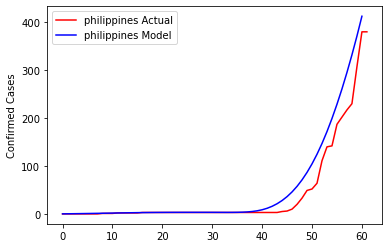

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 28, 30, 31, 34, 39, 43, 56, 62, 73, 82, 102, 113, 119, 142, 156, 194, 244, 330, 396, 396.0]


In [410]:
from scipy import integrate

philippines_y_pred = integrate.cumtrapz(deriv_philippines) 

plt.ylabel("Confirmed Cases")

plt.plot(philippines_y, color='red', label="philippines Actual")
plt.plot(philippines_y_pred, color='blue', label='philippines Model')
plt.legend()
plt.show()
print(india_y)

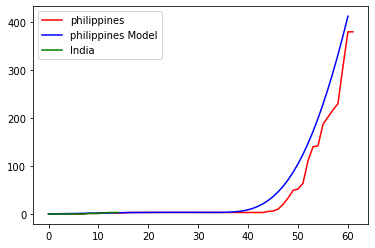

In [411]:
india_y = india_y[:15]
deriv_india = savgol_filter(india_y, 5, 2, 1)
deriv_india = savgol_filter(deriv_india, 9, 3, 0)

plt.plot(philippines_y, color='red', label='philippines')
plt.plot(philippines_y_pred, color='blue', label="philippines Model")
plt.plot(india_y, color='green', label='India')
plt.legend()
plt.show()

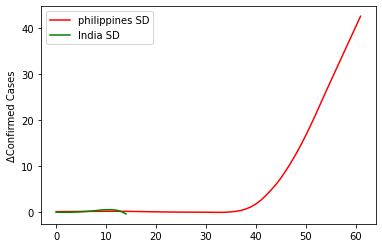

In [412]:
plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_philippines, color='red', label='philippines SD')
plt.plot(deriv_india, color='green', label='India SD')
plt.legend()
plt.show()

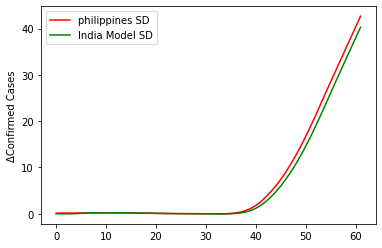

In [413]:
india_derv_model = np.roll(deriv_philippines, 1)
india_derv_model = savgol_filter(india_derv_model, 9, 2, 0)
india_basic_model= []
for i in range(8):
    india_basic_model.append(deriv_india[i])

for i in range(8, len(india_derv_model)):
    india_basic_model.append(india_derv_model[i])

plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_philippines, color='red', label="philippines SD")
plt.plot(india_basic_model, color='green', label='India Model SD')
plt.legend()
plt.show()

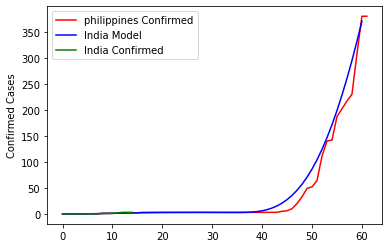

array([ 1.01010101e-03, -2.09235209e-02, -4.02236652e-02, -3.38383838e-02,
        1.81096681e-02,  1.33044733e-01,  3.26767677e-01,  5.31122414e-01,
        7.06494709e-01,  8.88419499e-01,  1.07571605e+00,  1.26620456e+00,
        1.45687278e+00,  1.64411390e+00,  1.82389621e+00,  1.99222648e+00,
        2.14567648e+00,  2.28190795e+00,  2.39975898e+00,  2.49903579e+00,
        2.58045002e+00,  2.64538621e+00,  2.69552810e+00,  2.73269028e+00,
        2.75893240e+00,  2.77636450e+00,  2.78678346e+00,  2.79173340e+00,
        2.79222685e+00,  2.78789924e+00,  2.77560742e+00,  2.75094932e+00,
        2.71493661e+00,  2.67692828e+00,  2.65304846e+00,  2.67228271e+00,
        2.78318798e+00,  3.05616797e+00,  3.58747403e+00,  4.50723500e+00,
        5.97924412e+00,  8.17717209e+00,  1.12658628e+01,  1.54039327e+01,
        2.07453243e+01,  2.74360030e+01,  3.56170980e+01,  4.54367467e+01,
        5.70475563e+01,  7.05908524e+01,  8.61971115e+01,  1.03991284e+02,
        1.24079867e+02,  

In [414]:
india_basic_model_confirmed = integrate.cumtrapz(india_basic_model)

plt.ylabel("Confirmed Cases")

plt.plot(philippines_y, color='red', label='philippines Confirmed')
plt.plot(india_basic_model_confirmed, color='blue', label='India Model')
plt.plot(india_y, color='green', label='India Confirmed')
plt.legend()
plt.show()
india_basic_model_confirmed

In [415]:
import time

predictions = pd.DataFrame(columns = ["Date", "Predicted Cases"])

start_pred = 1584748800
for i in range(57, len(india_basic_model_confirmed)):
    t = time.strftime('%Y-%m-%d', time.localtime(start_pred))
    pred = india_basic_model_confirmed[i]
    predictions.at[i-51, "Date"] = t
    predictions.at[i-51, "Predicted Cases"] = int(pred)
    start_pred = start_pred + 24*60*60
    
predictions

,Date,Predicted Cases
6,2020-03-21,260
7,2020-03-22,294
8,2020-03-23,331
9,2020-03-24,370
